# Predicting car prices

Goal: Predict car prices with K nearest neighbours using data on their properties e.g weight, horsepower, engine size etc

## Preparing and cleaning dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("data.txt", header= None, names= ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",  "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"])
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
# replace "?" values with numpy null values
cars = cars.replace("?", np.nan)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# cast numeric columns to float dtype 
cars = cars.astype({"normalized-losses": "float64", "bore": "float64", "stroke": "float64", "horsepower": "float64", "peak-rpm": "float64", "price": "float64"})
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
cars.corr()["price"]

symboling           -0.082391
normalized-losses    0.203254
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

### Comments on data:
- "normalized-losses" has 41 missing values
- remaining columns have 4 or less missing values
- "normalized-losses" have correlation of 0.2 with price, significantly less than other columns
- 9 columns have absolute correlation > 0.3


### Actions:
- Remove "normalized-losses" column
- Remove rows with missing values

In [7]:
# removes "normalized-losses" column
cars_cleaned = cars.drop(columns= ["normalized-losses"])
# removes rows with null values
cars_cleaned = cars_cleaned.dropna()

cars_cleaned

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [8]:
numeric_columns = cars_cleaned.select_dtypes(include=['number'])
numeric_columns

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [9]:
# normalizes the numeric columns between 0 and 1

normalized_numeric_columns = numeric_columns.copy()

for col in numeric_columns.columns:
    X = numeric_columns[col]
    
    normalized = (X - X.min()) / (X.max() - X.min())
    
    normalized_numeric_columns[col] = normalized
    
normalized_numeric_columns

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,0.291123
201,0.2,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,0.345738
202,0.2,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,0.406311
203,0.2,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,0.430763


## Creating the model

- We will first create a function to perform univariate prediction of car prices with default K value

- Then we will use the same function but vary the K value and plot the errors

- Finally, we'll perfom a multivariate prediction

### Univariate model with default K value

In [10]:
def knn_train_test(training_col, target_col, df):
    
    X_train, X_test, y_train, y_test = train_test_split(df[[training_col]], df[target_col], test_size=0.2, random_state=1)
    
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return rmse

In [11]:
knn_train_test("curb-weight", "price", normalized_numeric_columns)

0.12062604071583463

In [12]:
univariate_models = {}

for col in normalized_numeric_columns:
    
    rmse = knn_train_test(col, "price", normalized_numeric_columns)
    
    univariate_models[col] = rmse
    
univariate_models

{'symboling': 0.2172308830025265,
 'wheel-base': 0.14249712476503218,
 'length': 0.13089670734398912,
 'width': 0.11688430919088678,
 'height': 0.17959584480240556,
 'curb-weight': 0.12062604071583463,
 'engine-size': 0.05912598095073932,
 'bore': 0.1680992628318996,
 'stroke': 0.18572338981429637,
 'compression-ratio': 0.191622039153352,
 'horsepower': 0.09940416994497048,
 'peak-rpm': 0.22052969785475887,
 'city-mpg': 0.0776868037898343,
 'highway-mpg': 0.1022292875420808,
 'price': 0.007455803541896772}

In [13]:
# list of rmses for each feature ranked from lowest to highest error
univariate_models_series = pd.Series(univariate_models)
univariate_models_series = univariate_models_series.sort_values(ascending=True)
univariate_models_series = univariate_models_series.drop("price")
univariate_models_series

engine-size          0.059126
city-mpg             0.077687
horsepower           0.099404
highway-mpg          0.102229
width                0.116884
curb-weight          0.120626
length               0.130897
wheel-base           0.142497
bore                 0.168099
height               0.179596
stroke               0.185723
compression-ratio    0.191622
symboling            0.217231
peak-rpm             0.220530
dtype: float64

### Comments on univariate models with default K value:
- "engine-size" had the lowest RMSE (as well as the highest correlation shown previously)

### Univariate model with variable K value

In [14]:
def knn_train_test(training_col, target_col, df, k= 5):
    
    X_train, X_test, y_train, y_test = train_test_split(df[[training_col]], df[target_col], test_size=0.2, random_state=1)
    
    knn_regressor = KNeighborsRegressor(n_neighbors= k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return rmse



In [15]:
# performs univariate prediction for all numerical columns,
# with K values varying from 1,3,5,7,9

univariate_models_variable_k = {}

k_values = [1,3,5,7,9]

for col in normalized_numeric_columns:
    univariate_models_variable_k[col] = []
    
    for i in k_values:
        rmse = knn_train_test(col, "price", normalized_numeric_columns, i)
    
        univariate_models_variable_k[col].append(rmse)
    
univariate_models_variable_k

{'symboling': [0.2521774203967862,
  0.21908162823494767,
  0.2172308830025265,
  0.2119950604572942,
  0.20350186406395845],
 'wheel-base': [0.08291437837221317,
  0.09302985396556267,
  0.14249712476503218,
  0.14052292497905008,
  0.14510181661047067],
 'length': [0.14512622636894248,
  0.14043831888167566,
  0.13089670734398912,
  0.12941253912890482,
  0.1328867103311048],
 'width': [0.09698941669652048,
  0.11271139506235507,
  0.11688430919088678,
  0.11870420037049167,
  0.11918329525378352],
 'height': [0.3004512573968305,
  0.18984457943448244,
  0.17959584480240556,
  0.18648337220772246,
  0.19084977006004444],
 'curb-weight': [0.12632957682515228,
  0.13870012023560324,
  0.12062604071583463,
  0.11431780437087102,
  0.10754696603460483],
 'engine-size': [0.06802110544734241,
  0.06359480177110936,
  0.05912598095073932,
  0.06898157523804019,
  0.07711930062525219],
 'bore': [0.17917700185163513,
  0.17416870498060114,
  0.1680992628318996,
  0.17772394084001436,
  0.1864

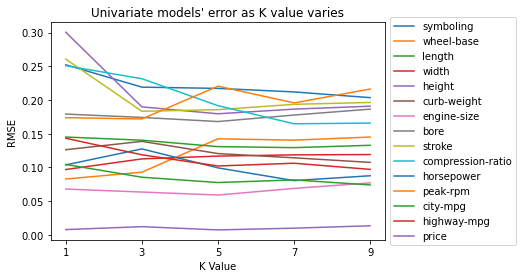

In [16]:
fig, ax = plt.subplots()


for col in univariate_models_variable_k:
    y = univariate_models_variable_k[col]
    x = k_values
    
    ax.plot(x, y, label= col)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xlabel('K Value')
ax.set_ylabel('RMSE')
ax.set_title('Univariate models\' error as K value varies')


plt.show()

### Multivariate model

In [17]:
def knn_train_test(training_col, target_col, df, k= 5):
    
    X_train, X_test, y_train, y_test = train_test_split(df[training_col], df[target_col], test_size=0.2, random_state=1)
    
    knn_regressor = KNeighborsRegressor(n_neighbors= k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return rmse

### Evaluating which number of features produces the lowest error 

In [21]:
# evaluating the RMSEs of models ranging from 2 - 5 features

for num_features in range(2, 6):
    features = list(univariate_models_series.index[:num_features])
    
    rmse = knn_train_test(features, "price", normalized_numeric_columns, k= 5)
    
    print("When using the " + str(num_features) + " best features, the RMSE is:" + str(rmse))
    

When using the 2 best features, the RMSE is:0.07238121733941168
When using the 3 best features, the RMSE is:0.05843502622945042
When using the 4 best features, the RMSE is:0.05808108959939217
When using the 5 best features, the RMSE is:0.06811762232591703


### Evaluating which K value for 3-5 features produces the lowest error 

In [31]:
multivariate_lib = {}

for num_features in range(3, 6):
    features = list(univariate_models_series.index[:num_features])
    multivariate_lib[num_features] = []
    
    for i in range(1, 26):
        rmse = knn_train_test(features, "price", normalized_numeric_columns, k= i)
        
        multivariate_lib[num_features].append(rmse)
    

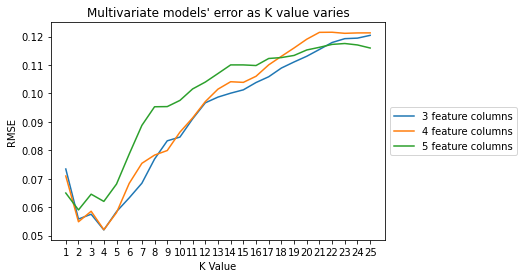

In [37]:
fig, ax = plt.subplots()

for num_feat in multivariate_lib:
    y = multivariate_lib[num_feat]
    x = range(1, 26)

    ax.plot(x, y, label= str(num_feat) + " feature columns")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xlabel('K Value')
ax.set_ylabel('RMSE')
ax.set_title('Multivariate models\' error as K value varies')


plt.show()

### Conclusion:
- Based on above analysis, the model that produces the lowest error uses 3-4 of the most accurate feature columns with K value of 4

In [38]:
rmse = knn_train_test(list(univariate_models_series.index[:3]), "price", normalized_numeric_columns, k= 4)
rmse

0.05199693029260771